In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from latexify import latexify, format_axes

In [4]:
df = pd.read_csv("../datasets/tennis-real-output.csv", index_col=[0])

In [5]:
df

,Outlook,Temp,Humidity,Wind,Minutes Played
Day,,,,,
D1,Sunny,Hot,High,Weak,20
D2,Sunny,Hot,High,Strong,24
D3,Overcast,Hot,High,Weak,40
D4,Rain,Mild,High,Weak,50
D5,Rain,Cool,Normal,Weak,60
D6,Rain,Cool,Normal,Strong,10
D7,Overcast,Cool,Normal,Strong,4
D8,Sunny,Mild,High,Weak,10
D9,Sunny,Cool,Normal,Weak,60


In [7]:
mean_mins = df["Minutes Played"].mean()
print(mean_mins)

32.714285714285715


In [8]:
initial_mse = ((df["Minutes Played"] - mean_mins) ** 2).mean()
print(initial_mse)

311.3469387755102


In [35]:
# Explore MSE for different splits based on the "Outlook" attribute
weighted_total_mse = 0.0
for category in df["Wind"].unique():
    subset = df[df["Wind"] == category]
    
    # Calculate MSE for the subset
    mse_subset = ((subset["Minutes Played"] - subset["Minutes Played"].mean()) ** 2).mean()
    
    # Calculate the weighted MSE
    weighted_mse = (len(subset) / len(df)) * mse_subset
    weighted_total_mse = weighted_total_mse + weighted_mse
    
    print(subset["Minutes Played"].values)
    print(f"Wind: {category}")
    print("Subset MSE:", mse_subset)
    print(f"Weighted MSE = {len(subset)}/{len(df)} * {mse_subset:0.4} = {weighted_mse:0.4}")
    print("\n")

print("Weighted total MSE:", weighted_total_mse)

[20 40 50 60 10 60 40 35]
Wind: Weak
Subset MSE: 277.734375
Weighted MSE = 8/14 * 277.7 = 158.7


[24 10  4 45 40 20]
Wind: Strong
Subset MSE: 218.13888888888889
Weighted MSE = 6/14 * 218.1 = 93.49


Weighted total MSE: 252.19345238095235


In [31]:
reduction_mse_wind = initial_mse - weighted_total_mse
print(reduction_mse_wind)

59.15348639455783


In [27]:
def reduction_mse(df_dataset, input_attribute, target_attribute):
    # Calculate the initial MSE
    mean_target = df_dataset[target_attribute].mean()
    initial_mse = ((df_dataset[target_attribute] - mean_target) ** 2).mean()
    weighted_total_mse = 0.0

    for category in df_dataset[input_attribute].unique():
        subset = df_dataset[df_dataset[input_attribute] == category]
        mse_subset = ((subset[target_attribute] - subset[target_attribute].mean()) ** 2).mean()
        
        weighted_mse = (len(subset) / len(df_dataset)) * mse_subset
        weighted_total_mse = weighted_total_mse + weighted_mse
    
    return initial_mse - weighted_total_mse

    

In [36]:
reduction = {}
for attribute in ["Outlook", "Temp", "Humidity", "Wind"]:
    reduction[attribute] = reduction_mse(df, attribute, "Minutes Played")
    
reduction_ser = pd.Series(reduction)

In [41]:
latexify()

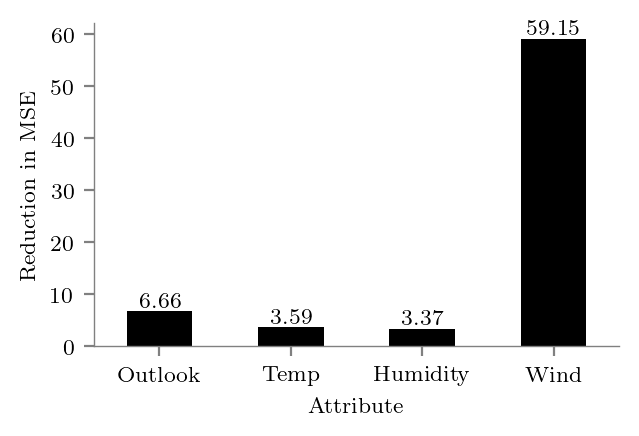

In [46]:
bars = reduction_ser.plot(kind='bar', rot=0, color='k')
format_axes(plt.gca())

# Add values on top of the bars
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xlabel("Attribute")
plt.ylabel("Reduction in MSE")
plt.savefig("../figures/decision-trees/discrete-input-real-output-level-1.pdf")